In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Connect to database (creates one if it doesn’t exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Step 2: Create sales table and insert data (only run once!)
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
# Optional: Insert dummy data
cursor.executemany("""
INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
""", [
    ("Apple", 10, 5),
    ("Banana", 15, 3),
    ("Apple", 20, 5),
    ("Orange", 12, 4),
])

conn.commit()


In [5]:
# Step 3: SQL query to summarize data
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

In [6]:
# Step 4: Run query using pandas
df = pd.read_sql_query(query, conn)

In [7]:
# Step 5: Print result
print(df)

  product  total_qty  revenue
0   Apple         30    150.0
1  Banana         15     45.0
2  Orange         12     48.0


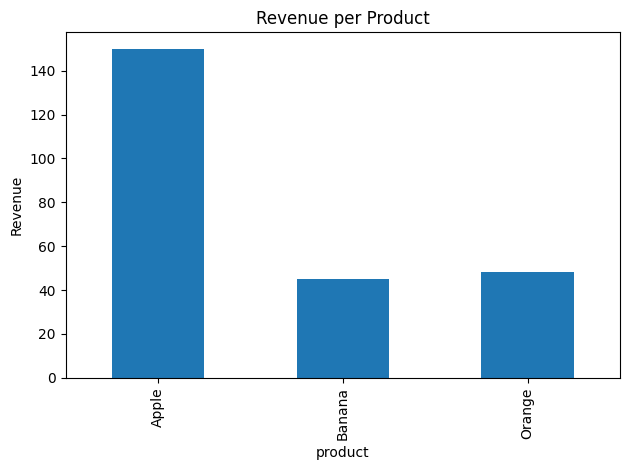

In [8]:
# Step 6: Plot the revenue per product
df.plot(kind='bar', x='product', y='revenue', title='Revenue per Product', legend=False)
plt.ylabel('Revenue')
plt.tight_layout()

In [9]:
# Optional: Save the chart
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [10]:
# Show plot
plt.show()

In [11]:
# Close connection
conn.close()